# Prática 5: Redes Neurais
Na prática a seguir implementamos uma rade neural para resolver um problema de classificação de pacientes ortopédicos a partir de atributos biomecânicos fornecidos no arquivo "column_3C.dat"
Para tanto, implementamos um perceptron que pode receber dinamicamente sua função de ativação.

Inicialmente vamos analisar os resultados obtidos por uma função degrau

In [1]:
from neural import NeuralNetwork, TestSubject
import matplotlib.pyplot as plt

In [2]:
#inicialização da classe neural
neural_network = NeuralNetwork()

#coleta do conjunto de dados de treino e teste para o arquivo especificado e suas classes
subject = TestSubject("column_3C.dat",{"DH":[0,0,1],"SL":[0,1,0],"NO":[1,0,0]})
X,d,Xt,dt = subject.drawSamples(0.7)

#realização do treino
w_step,b_step,err_epoch_step = neural_network.train(alpha=0.1, max_it=100, X=X, d=d, function=neural_network.step)

Com a realização do treino a partir da função degrau, temos os vetores de pesos (w) e bias(b) que podem ser aplicados na função de testes. Antes de aplicar os testes, iremos exibir o comportamento do erro encontrado em cada uma das 100 épocas iteradas.

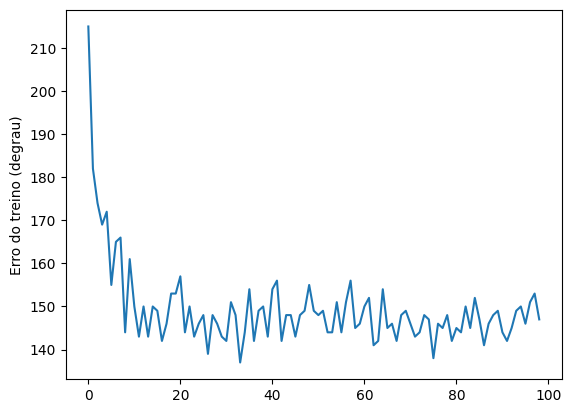

In [3]:
plt.plot(err_epoch_step)
plt.ylabel('Erro do treino (degrau)')
plt.show()

Como esperado, o erro caiu consideravelmente nas primeiras iterações e se manteve estável nas subsequentes.
Agora iremos realizar os testes e calcular a acurácia da rede.

In [4]:
y_found_step = neural_network.test(w_step,b_step,Xt,dt, function=neural_network.step)
acc = sum(y_found_step)/len(y_found_step)
print(f"Acurácia: {acc}")

Acurácia: 0.6741935483870968


Obtivemos uma acurácia de 67%. Em sequencia iremos executar um novo treino utilizando, agora, a função de ativação sigmoidal

c:\Users\h8men\OneDrive\Documentos\Cefet\Setimo período\IA\AI-neural-network-orthopedics\neural.py:67: RuntimeWarning: overflow encountered in exp
  return np.array([1 / (1 + np.exp(-i)) for i in x])


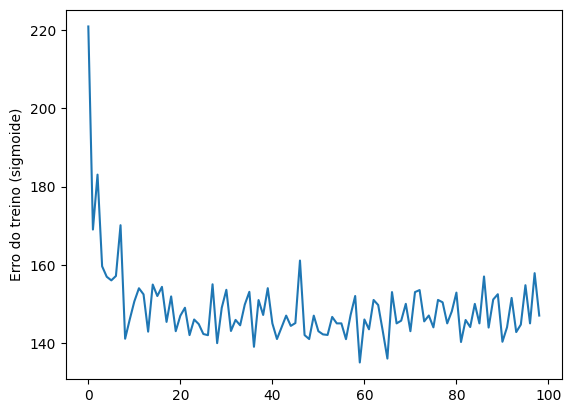

In [5]:
subject = TestSubject("column_3C.dat",{"DH":[0,0,1],"SL":[0,1,0],"NO":[1,0,0]})
X,d,Xt,dt = subject.drawSamples(0.7)

w_sigmoid,b_sigmoid,err_epoch_sigmoid = neural_network.train(alpha=0.1, max_it=100, X=X, d=d, function=neural_network.sigmoid)
plt.plot(err_epoch_sigmoid)
plt.ylabel('Erro do treino (sigmoide)')
plt.show()

In [6]:
y_found = neural_network.test(w_sigmoid,b_sigmoid,Xt,dt, function=neural_network.sigmoid)
acc = sum(y_found)/len(y_found)
print(f"Acurácia: {acc}")

Acurácia: 0.7935483870967742


O resultado obtido foi esperado, considerando que o função sigmoide consegue fazer uma predição mais flexível, mesmo com os gráficos de erro por época estando consideravelmente similares. Tal fato resultou em um aumento de cerca de 12% na acurácia, sendo satisfatório.